<a href="https://colab.research.google.com/github/ricardoemf03/applied-physics/blob/ricardoemf03-computational-physics/(EN)_Perihelion_Precession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analysis of Mercury's Perihelion Precession: A Numerical Approach Using Second-Order Runge-Kutta Method**
#### **Ricardo José Manuel Escobar Matzir**
#### **computational physics**

##**Define the problem and the initial conditions**

This work aims to calculate the value of the perihelion precession angle in Mercury's orbit. The approach is based on a numerical analysis using the second-order Runge-Kutta method. Additionally, the force considered is the universal gravitation force with a very weak correction that allows us to predict this precession.

**The force is given by:**
$$\vec{F} = \frac{GM_SM_M}{r^2}\left(1+\frac{\alpha}{r^2}\right)\frac{\vec{r}}{r}$$

$$   \begin{array}{cc}\frac{dx}{dt} = v_x; & \hspace{12pt} \frac{dv_x}{dt} = - \frac{GM_SM_M}{r^3}\left(1+\frac{\alpha}{r^2}\right)x \\ \frac{dy}{dt} = v_y;  & \hspace{12pt}  \frac{dv_y}{dt} = - \frac{GM_SM_M}{r^3}\left(1+\frac{\alpha}{r^2}\right)y\end{array}$$

**While implemented with the second-order Runge-Kutta method, they become the following::**

$$\begin{array}{ll}k_1 = v_n^x\Delta t  & k_3 = -\frac{GM_S}{r_n^3}\left(1+\frac{\alpha}{r_n^2}\right) x_n \Delta t   \\ k_2 =\left(v_n^x+\frac{1}{2}k_3\right)\Delta t & k_4 = -\frac{GM_S}{R_n^3}\left(1+\frac{\alpha}{R_n^2}\right)\left(x_n+\frac{1}{2}k_1\right) \Delta t \\ k_1' = v_n^y\Delta t  & k_3' = -\frac{GM_S}{r_n^3}\left(1+\frac{\alpha}{r_n^2}\right) y_n \Delta t   \\ k_2' =\left(v_n^y+\frac{1}{2}k_3'\right)\Delta t & k_4' = -\frac{GM_S}{R_n^3}\left(1+\frac{\alpha}{R_n^2}\right)\left(y_n+\frac{1}{2}k_1'\right) \Delta t\\  r_n = \sqrt{x_n^2+y_n^2} & R_n = \sqrt{\left(x_n+\frac{1}{2}k_1\right)^2+\left(y_n+\frac{1}{2}k_1'\right)^2} \end{array}$$

$$\begin{array}{ll} x_{n+1} = x_n+k_2 & \hspace{12pt} v_{n+1}^x = v_n^x +k_4  \\ y_{n+1}=y_n+k_2' & \hspace{12pt} v_{n+1}^y = v_n^y +k_4' \end{array}$$


**And the initial conditions are:**

$$\begin{array}{ll} x_0 = (1+e)a, & y_0 = 0  \\ v_0^x = 0,    & v_0^y = \sqrt{\frac{GM_S}{a}\frac{1-e}{1+e}} \end{array}$$

**With values for the Sun and Mercury of:**

$$ \begin{array}{l} a = 0.39 \text{ UA}\\  e = 0.206 \\  GM_S = 4\pi^2 \text{ UA}^3/\text{año}^2\\  \Delta t = 0.0001\\  N = 20 000 \end{array}$$

**The values of \\(\alpha\\) are \\(\alpha = 0.0008, 0.001, 0.002,  0.004\\)**

To then make an extrapolation and find the precession angle for \\(\alpha = 1.1\times 10^{-8} \text{UA}^2 \\)



##**Program implementation for \\(\alpha = 0.0008\\)**

First, we define all the initial conditions, the number of iterations, and the step size.

In [ ]:
#Initial conditions
import numpy as np
alpha = 0.0008    #UA^2
a = 0.39          #UA
e = 0.206         #Dimensionless
GM = 4*np.pi**2   #UA^3/year^2
x0 =0.47          #UA  (1+e)a
y0 = 0
vx0 = 0
vy0 = 8.2         # AU/year sqrt((GM/a)*((1-e)/(1+e)))
dt = 0.0001
N = 20000

In [ ]:
#We difine a fuction for the force

def F(r, alpha):
  Fk = -(GM/r**3)*(1+alpha/r**2)
  return Fk

In [ ]:
#We define the function for the second-order Runge-Kutta numerical method,
#which will numerically solve the differential equation given the initial conditions.

def RungeKutta2(x0, y0, vx0, vy0, dt, N, alpha):
  "Second-Order Runge-Kutta Method for Planetary Orbits"
  X, Y, VX, VY, Tiempo, DIST_MS, Deriv_DIST_MS = [], [], [], [], [], [], []
  x, y, vx, vy, distMS, deriv_distMS = x0, y0, vx0, vy0, 0, 0
  for i in range(N):
    r = np.sqrt(x**2 + y**2)
    k1 = vx*dt
    k3 = F(r, alpha)*x*dt
    k1_ = vy*dt
    R = np.sqrt((x+0.5*k1)**2+(y+0.5*k1_)**2)
    k2 = (vx+0.5*k3)*dt
    k4 = F(R, alpha)*(x+0.5*k1)*dt
    k4_ = F(R, alpha)*(y+0.5*k1_)*dt
    k3_ = F(r, alpha)*y*dt
    k2_ = (vy+0.5*k3_)*dt

    x = x+k2
    vx = vx + k4
    y = y + k2_
    vy = vy + k4_

    theta = np.arctan2(y, x)
    distMS = (a * (1 - e**2)) / (1 - e * np.cos(theta))

    deriv_distMS = (x*vx+y*vy)/distMS

    Tiempo.append(i*dt)
    DIST_MS.append(distMS)
    Deriv_DIST_MS.append(deriv_distMS)
    X.append(x)
    Y.append(y)
    VX.append(vx)
    VY.append(vy)
  return X, Y, VX, VY, Tiempo, DIST_MS, Deriv_DIST_MS

Once the function \\(\texttt{RungeKutta2}(\cdots)\\) is created, we call it by providing our initial conditions, and, as a first step, it plots Mercury's orbit around the Sun.

In [ ]:
x_runge, y_runge, vx_runge, vy_runge, Tiempo_runge, distMS_runge, deriv_distMS_runge = RungeKutta2(x0, y0, vx0, vy0, dt, N, alpha)

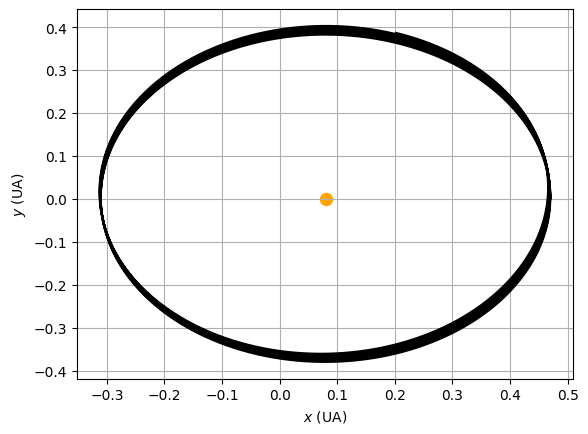

In [ ]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(x_runge, y_runge, color = "black")


# Draw the horizontal line from \(x = e \cdot a\) to \(x = (1 + e) \cdot a\) at \(y = 0\).
plt.scatter(e*a, 0, color='orange', s=75)
plt.xlabel("$x $ (UA)")
plt.ylabel("$y $ (UA)")
plt.savefig("orbitas.pdf", format='pdf')
plt.show()


Now we plot the angle made by Mercury's position vector with the horizontal as a function of time. Clearly, the angles will vary from 0 to 360 degrees in one orbit and then reset.

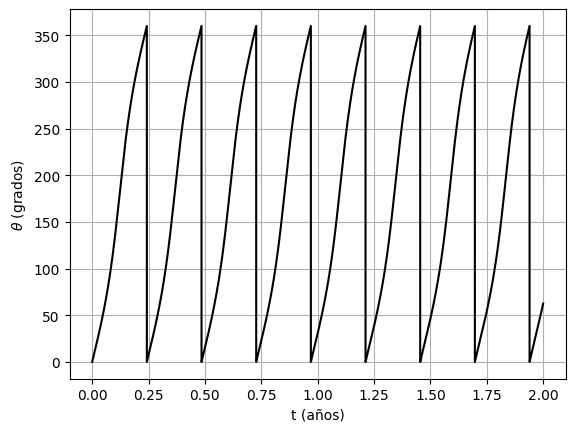

In [ ]:
ANG = []
for i in range(len(x_runge)):
  ang = np.degrees(np.arctan2(y_runge[i],x_runge[i]))
  if 0 <= ang <=180:
    ANG.append(ang)
  else:
    ANG.append(360+ang)

plt.grid(True)
plt.plot(Tiempo_runge, ANG, color = "black")
#plt.title("Angle of the position vector with the horizontal")
plt.xlabel("t (años)")
plt.ylabel("$\\theta$ (grados)")
plt.savefig("angulos.pdf", format='pdf')
plt.show()

Now we plot the distance between Mercury's position vector and the Sun's position as a function of time. In this graph, we observe an oscillatory behavior as expected. The maxima indicate the farthest points of Mercury from the Sun (the aphelion), while the minima represent the closest point of Mercury to the Sun (the perihelion).

This distance is calculated using  

$$r' = \frac{a(1-e^2)}{1 - e \cos\theta}$$  
where \\(\theta\\) is the angle that Mercury's position makes with the horizontal.

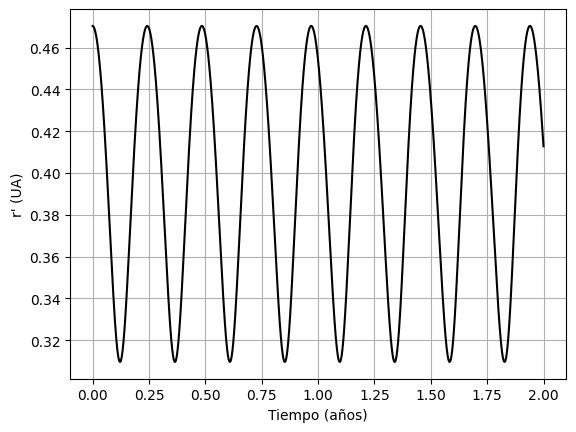

In [ ]:
plt.grid(True)
plt.plot(Tiempo_runge, distMS_runge, color = "black")
#plt.title("r' vs time")
plt.xlabel("Tiempo (year)")
plt.ylabel("r' (UA)")
plt.savefig("distanc.pdf", format='pdf')
plt.show()

Now we calculate the derivative of \\(r'\\), which is given by  

$$\frac{dr'}{dt} = \frac{xv_x + yv_y}{r'} $$

This is because the zeros of this derivative will give us the exact times when Mercury passes through the perihelion or aphelion, i.e., the maximum and minimum points of the previous graph.

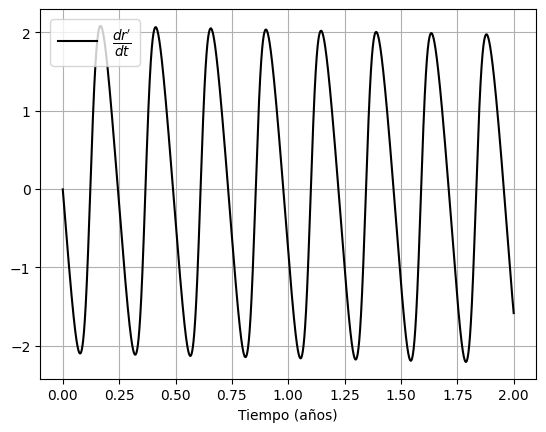

In [ ]:
plt.grid(True)
plt.plot(Tiempo_runge, deriv_distMS_runge, color = "black", label = "$\\frac{dr'}{dt}$")
#plt.title("dr'/dt vs time")
plt.xlabel("Tiempo (años)")
#plt.ylabel("dr'/dt")
plt.legend(loc="upper left", fontsize = 14)
plt.savefig("deriv_dist.pdf", format='pdf')
plt.show()

Now we filter the times when the derivative equals zero, indicating the moments when Mercury passes through its closest or farthest points from the Sun. We then determine the angle it makes with the horizontal. We focus only on the angles at the closest points (the perihelion).

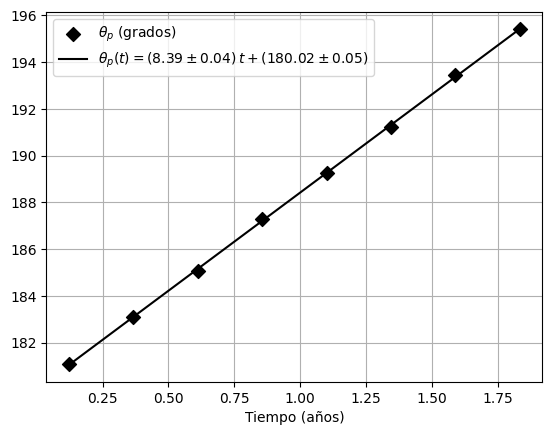

La pendiente de la regresión lineal es:  8.394738842117995


In [ ]:
#Here, we calculate angulo_p, which represents all the
#angles where Mercury passes through its perihelion, i.e., its closest point to the Sun.
ANG_P = []
Tiempo_P = []
interv = 0.004 #interval near to zero
for i in range(len(Tiempo_runge)):
  val = deriv_distMS_runge[i]
  if -interv <= val <= interv:
    if  ANG[i] >= 180: #Since we are only interested in the perihelion angles.
      ANG_P.append(ANG[i])
      Tiempo_P.append(Tiempo_runge[i])
#We perform a linear regression.
#m, b = np.polyfit(Tiempo_P, ANG_P, 1)
# Linear fit with covariance.
coefs, cov_matrix = np.polyfit(Tiempo_P, ANG_P, 1, cov=True)
m, b = coefs
error_m = np.sqrt(cov_matrix[0, 0])
error_b = np.sqrt(cov_matrix[1, 1])

#graph
plt.grid(True)
plt.scatter(Tiempo_P, ANG_P, color = "black", label = "$\\theta_p$ (degrees)", marker = "D", s= 50)
# Graficar la línea de regresión
plt.plot(Tiempo_P, m * np.array(Tiempo_P) + b, color="black",
         label=f"$\\theta_p (t) = ({m:.2f} \\pm {error_m:.2f}) \\, t + ({b:.2f} \\pm {error_b:.2f})$")
#plt.title("Ángulo_p vs time")
plt.xlabel("Time (years)")
#plt.ylabel("Ángulo_p")
plt.legend(loc="upper left")
plt.savefig("regresion1.pdf", format='pdf')
plt.show()

print("The slope of the linear regression is: ", m)

From the value of the regression, we see that
$$\frac{d\theta_p}{dt} = 8.
39\pm 0.04 \text{ degrees/year}$$
for \\(\alpha = 0.0008\\)

##**Implementation of the program for other values of. \\(\alpha\\)**

Now we repeat all the above steps for
**the values of \\(\alpha = 0.0008, 0.001, 0.002,  0.004\\)**

This time, however, we focus only on calculating the slopes of the regressions, that is, the variation. \\(\frac{d\theta_p}{dt}\\) for each value of \\(\alpha\\).

In [ ]:
import pandas as pd
ALPHA = [0.0008, 0.001, 0.002, 0.004]
Pendientes = []
Pendientes_err = []

for alpha1 in ALPHA:
  x_runge1, y_runge1, vx_runge1, vy_runge1, Tiempo_runge1, distMS_runge1, deriv_distMS_runge1 = RungeKutta2(x0, y0, vx0, vy0, dt, N, alpha1)
  #We calculate all the angles of the orbits.
  ANG1 = []
  for i in range(len(Tiempo_runge1)):
    ang = np.degrees(np.arctan2(y_runge1[i],x_runge1[i]))
    if 0 <= ang <=180:
      ANG1.append(ang)
    else:
      ANG1.append(360+ang)
  #We calculate the perihelion angles with the horizontal and their corresponding times.
  ANG_P = []
  Tiempo_P = []
  interv = 0.004 #interval near to zero
  for i in range(len(Tiempo_runge1)):
    val = deriv_distMS_runge1[i]
    if -interv <= val <= interv:
      if  ANG1[i] >= 180: #Since we are only interested in the perihelion angles.
        ANG_P.append(ANG1[i])
        Tiempo_P.append(Tiempo_runge1[i])
  #m, b = np.polyfit(Tiempo_P, ANG_P, 1)
  # Linear fit with covariance.
  coefs, cov_matrix = np.polyfit(Tiempo_P, ANG_P, 1, cov=True)
  m, b = coefs

  # Slope error.
  error_m = np.sqrt(cov_matrix[0, 0])
  Pendientes.append(m)
  Pendientes_err.append(error_m)

df = pd.DataFrame({
    'alpha': ALPHA,
    'dtheta/dt': Pendientes,
    'error': Pendientes_err
})

print(df.to_string(index=False))

 alpha  dtheta/dt    error
0.0008   8.394739 0.042968
0.0010  10.540204 0.040714
0.0020  21.658811 0.046134
0.0040  45.378049 0.043769


We plot the results and perform a linear fit to find the value of \\(\frac{d\theta_p}{dt}\\) corresponding to \\(\alpha = 1.1\times 10^{-8}\\)

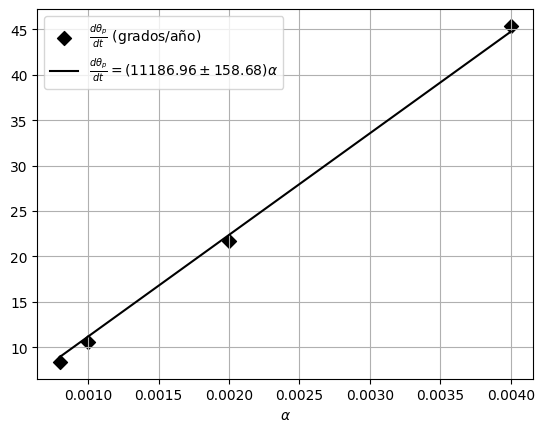

44.30036143901436 segundo de arco por siglo


In [ ]:
from scipy.optimize import curve_fit


# Input data
x_val = np.array(ALPHA)  # values of x (without error)
y_val = np.array(Pendientes)  # values of y (without error)

#We define the linear function without an intercept term.
def linear_model(x, m):
    return m * x

# Curve fitting.
params, covariance = curve_fit(linear_model, x_val, y_val)

# Fitted parameters.
m1 = params[0]
# Error in the slope from the covariance matrix.
error_m1 = np.sqrt(covariance[0, 0])

# Graph
plt.grid(True)
plt.scatter(ALPHA, Pendientes, color="black", marker="D", s=50, label="$\\frac{d\\theta_p}{dt}$ (degrees/year)")
plt.plot(ALPHA, m1 * np.array(ALPHA), color="black", label=f"$\\frac{{d\\theta_p}}{{dt}} = ({m1:.2f} \\pm {error_m1:.2f}) \\alpha$")
plt.xlabel("$\\alpha$")
plt.legend(loc="upper left", fontsize=10)
plt.savefig("regresion2.pdf", format='pdf')
plt.show()

#
print((m1 * (1.1e-8)) * 100 * 3600, "arcseconds per century")


In this linear regression, we have found that
$$\frac{d\theta_p}{dt} = (11186.96 \pm 158.68) \alpha$$
Thus, using the actual value of \\(\alpha = 1.1\times 10^{-8}\\) we obtain that
$$\frac{d\theta_p}{dt} = (11186.96 \pm 158.68) \times (1.1\times 10^{-8}) \frac{\text{degrees}}{\text{year}} \times \frac{100 \text{ years}}{1 \text{ century}} \times \frac{3600 \text{ seconds}}{1 \text{ degree}} = 44. 3 \pm 0.6\text{ arcseconds per century}$$

Para exportar orbitas a un archivo txt.

In [ ]:
orbitas = RungeKutta2(x0, y0, vx0, vy0, dt, 30000, 0.01)

In [ ]:
lista1= orbitas[0]
lista2= orbitas[1]

or_x = [round(num, 2) for num in lista1]
or_y = [round(num, 2) for num in lista2]

In [ ]:
with open('orbitas3.txt', 'w') as file:
    file.write(','.join(map(str, or_x)) + '\n')  # save lista1 in the first line
    file.write(','.join(map(str, or_y)) + '\n')  # save lista2 in the first line


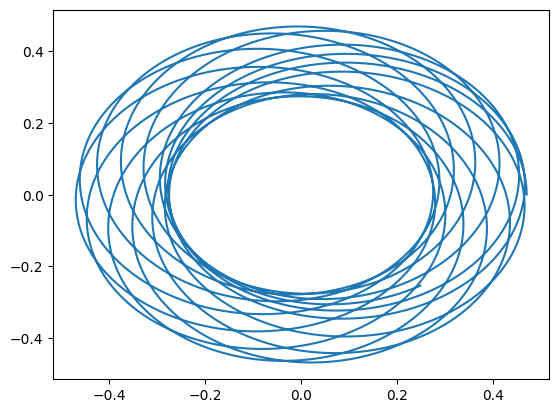

In [ ]:
plt.plot(lista1, lista2)
plt.show()